In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('real_estate_prices.csv')

# Preview the data
print(df.head())
print(df.info())
print(df.describe())


                         Date    Location  Square_Feet  Bedrooms  Bathrooms  \
0  2024-07-25 04:54:55.161224  Location_C         3824         5          2   
1  2024-07-24 04:54:55.161237  Location_A         4985         5          3   
2  2024-07-23 04:54:55.161240  Location_C          755         4          1   
3  2024-07-22 04:54:55.161242  Location_C         2338         2          2   
4  2024-07-21 04:54:55.161244  Location_A         2444         5          2   

   Age_of_Property  Nearby_Schools  Crime_Rate  Average_Income  Interest_Rate  \
0               48               3   33.362840    77578.805178       2.499300   
1               20               2   79.155820    33967.630252       3.485322   
2               67               4   45.129411    32427.089296       3.874872   
3               44               3   18.344220    57433.739406       1.442414   
4               33               4   85.497402    78801.458450       1.142361   

   Real_Estate_Price  
0       1.70524

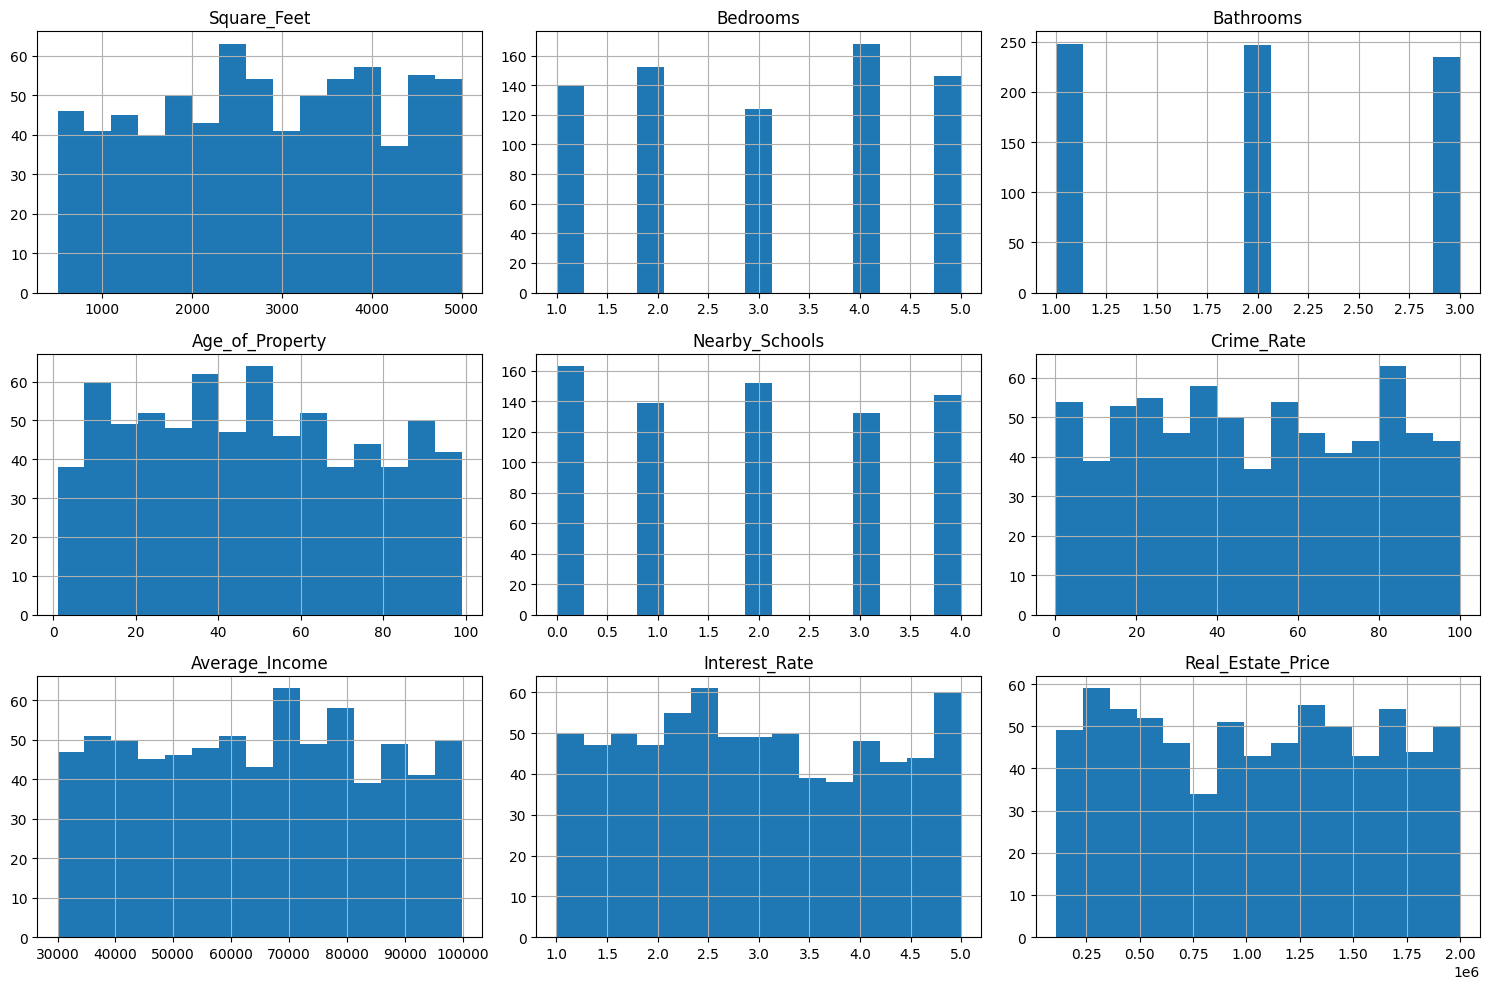

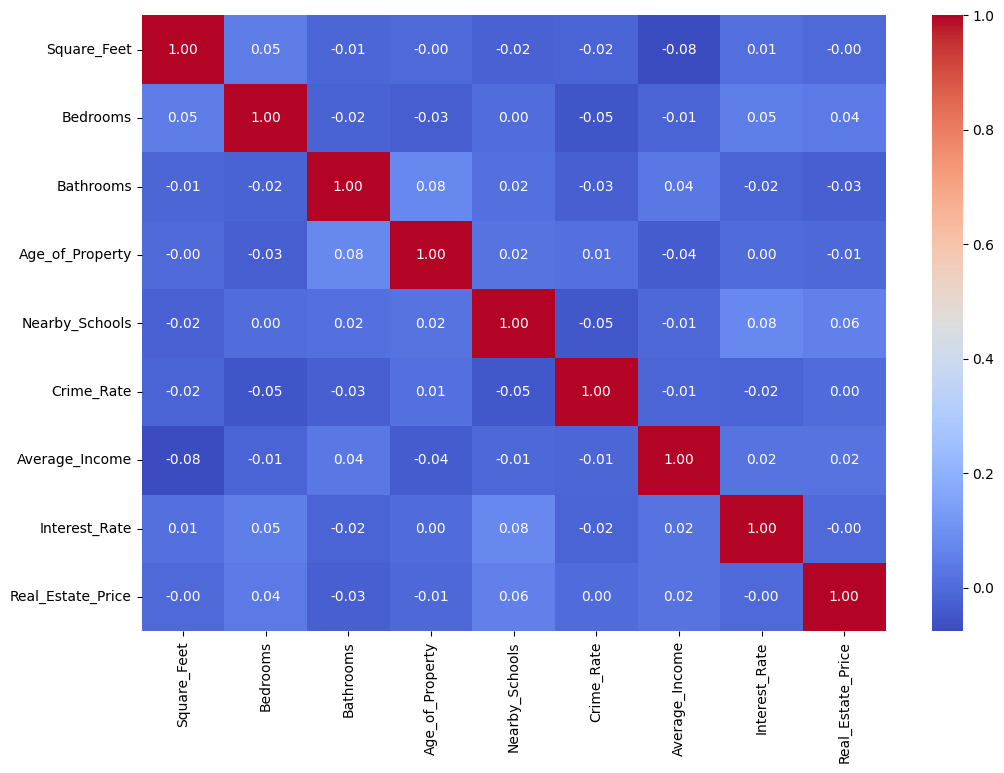

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of numeric features
numeric_features = ['Square_Feet', 'Bedrooms', 'Bathrooms', 'Age_of_Property', 'Nearby_Schools', 'Crime_Rate', 'Average_Income', 'Interest_Rate', 'Real_Estate_Price']
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Location' categorical feature
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])


In [5]:
X = df.drop(['Date', 'Real_Estate_Price'], axis=1)
y = df['Real_Estate_Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model_fnn = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model_fnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_fnn = model_fnn.fit(X_train_scaled, y_train, epochs=50, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_fnn = model_fnn.predict(X_test_scaled)
fnn_loss = model_fnn.evaluate(X_test_scaled, y_test)
print('FNN Test Loss:', fnn_loss)


Epoch 1/50
17/17 [==============================] - 2s 25ms/step - loss: 1359491891200.0000 - val_loss: 1757385457664.0000
Epoch 2/50
17/17 [==============================] - 0s 9ms/step - loss: 1359489007616.0000 - val_loss: 1757381263360.0000
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 1359484157952.0000 - val_loss: 1757373005824.0000
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 1359475376128.0000 - val_loss: 1757359374336.0000
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 1359460696064.0000 - val_loss: 1757336305664.0000
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 1359437234176.0000 - val_loss: 1757301309440.0000
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 1359402631168.0000 - val_loss: 1757250846720.0000
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 1359353348096.0000 - val_loss: 1757180592128.0000
Epoch 9/50
17/17 [=====

In [7]:
from tensorflow.keras.layers import LSTM, Reshape

# Reshape data for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_lstm = model_lstm.predict(X_test_lstm)
lstm_loss = model_lstm.evaluate(X_test_lstm, y_test)
print('LSTM Test Loss:', lstm_loss)


Epoch 1/50
17/17 [==============================] - 2s 23ms/step - loss: 1359493595136.0000 - val_loss: 1757388865536.0000
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 1359492939776.0000 - val_loss: 1757387948032.0000
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 1359491629056.0000 - val_loss: 1757385588736.0000
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 1359489007616.0000 - val_loss: 1757381132288.0000
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 1359483764736.0000 - val_loss: 1757372088320.0000
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 1359473934336.0000 - val_loss: 1757356490752.0000
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 1359457812480.0000 - val_loss: 1757330800640.0000
Epoch 8/50
17/17 [==============================] - 0s 8ms/step - loss: 1359431335936.0000 - val_loss: 1757290954752.0000
Epoch 9/50
17/17 [=====

In [8]:
from tensorflow.keras.layers import Bidirectional

# Define the model
model_bilstm = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_bilstm = model_bilstm.fit(X_train_lstm, y_train, epochs=50, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_bilstm = model_bilstm.predict(X_test_lstm)
bilstm_loss = model_bilstm.evaluate(X_test_lstm, y_test)
print('BiLSTM Test Loss:', bilstm_loss)


Epoch 1/50
17/17 [==============================] - 3s 29ms/step - loss: 1359493464064.0000 - val_loss: 1757388734464.0000
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 1359492284416.0000 - val_loss: 1757386506240.0000
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 1359489400832.0000 - val_loss: 1757381001216.0000
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 1359482322944.0000 - val_loss: 1757368025088.0000
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 1359467511808.0000 - val_loss: 1757341941760.0000
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 1359438675968.0000 - val_loss: 1757294755840.0000
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 1359388344320.0000 - val_loss: 1757215195136.0000
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 1359305506816.0000 - val_loss: 1757089890304.0000
Epoch 9/50
17/17 [=====

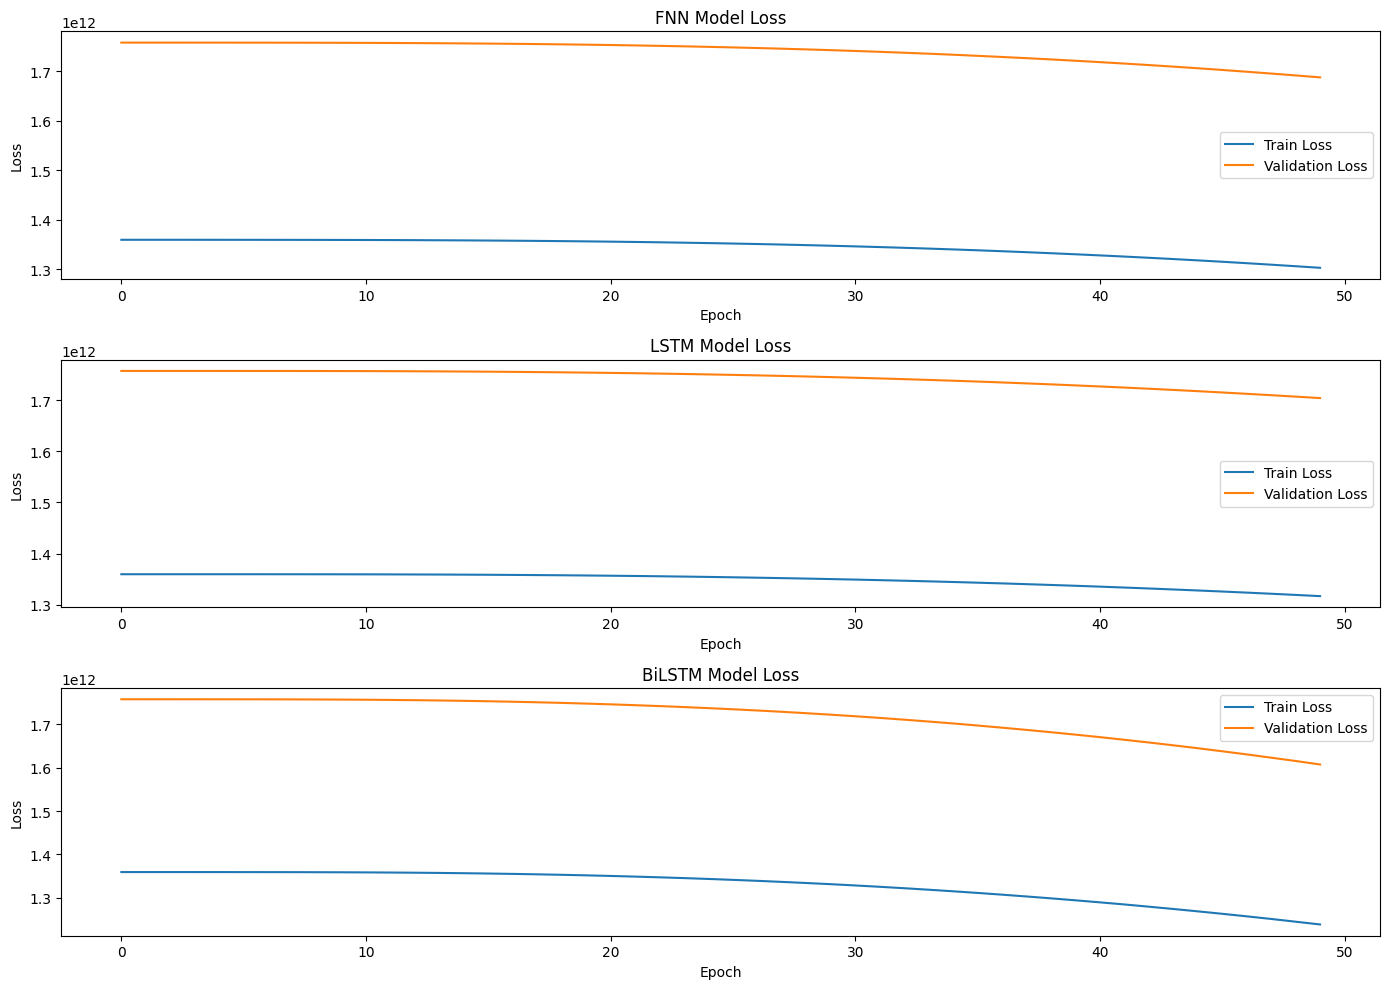

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values for FNN
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(history_fnn.history['loss'], label='Train Loss')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss')
plt.title('FNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values for LSTM
plt.subplot(3, 1, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values for BiLSTM
plt.subplot(3, 1, 3)
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


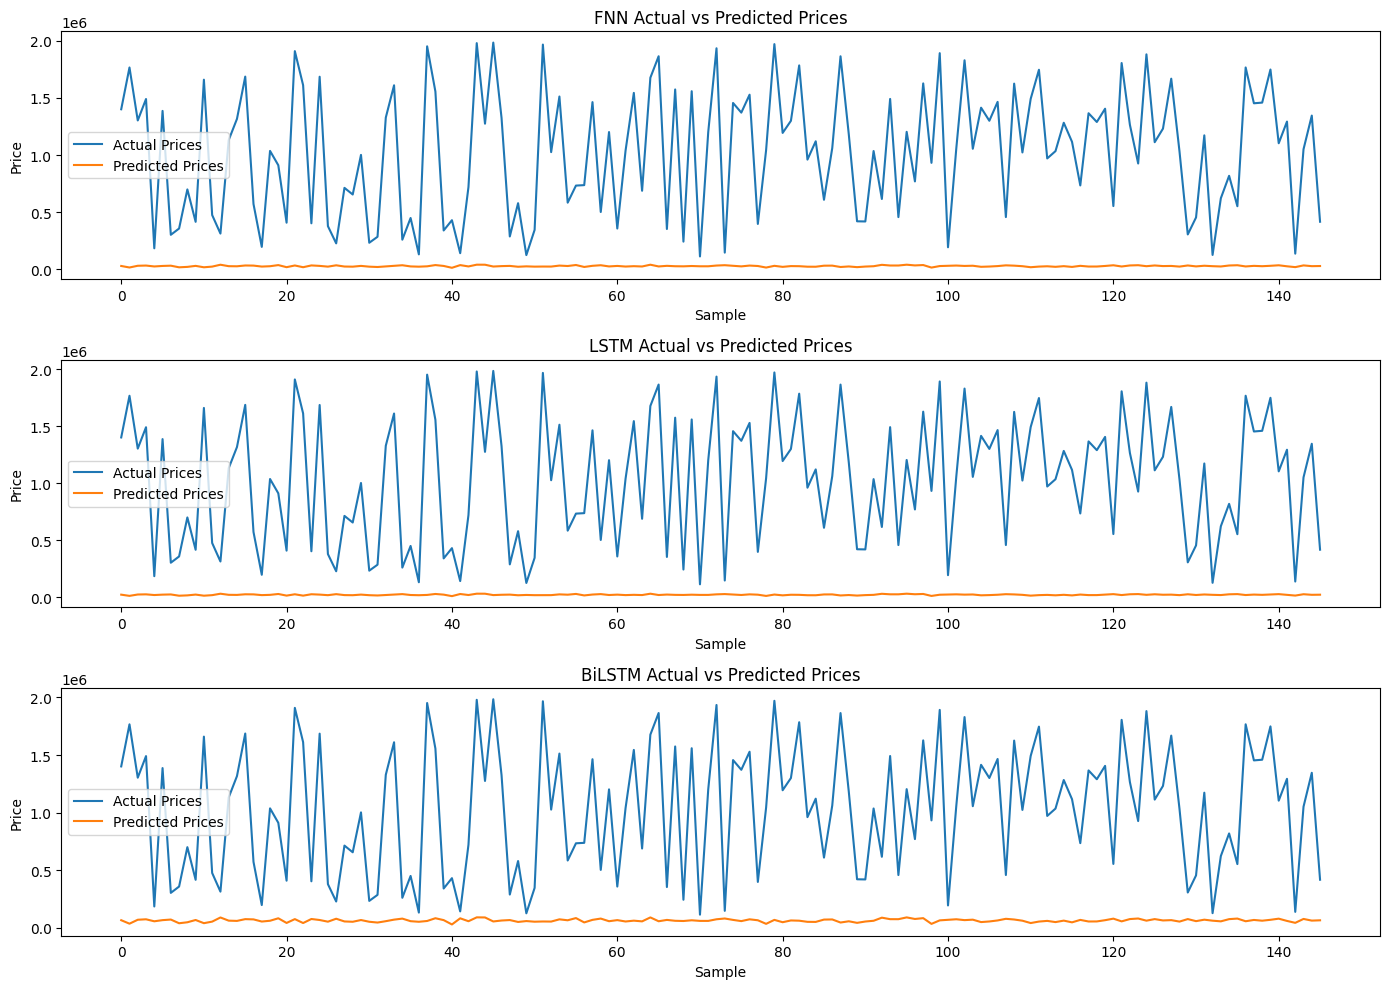

In [10]:
# Visualize actual vs predicted prices
plt.figure(figsize=(14, 10))

# Actual vs Predicted for FNN
plt.subplot(3, 1, 1)
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_fnn, label='Predicted Prices')
plt.title('FNN Actual vs Predicted Prices')
plt.ylabel('Price')
plt.xlabel('Sample')
plt.legend()

# Actual vs Predicted for LSTM
plt.subplot(3, 1, 2)
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_lstm, label='Predicted Prices')
plt.title('LSTM Actual vs Predicted Prices')
plt.ylabel('Price')
plt.xlabel('Sample')
plt.legend()

# Actual vs Predicted for BiLSTM
plt.subplot(3, 1, 3)
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_bilstm, label='Predicted Prices')
plt.title('BiLSTM Actual vs Predicted Prices')
plt.ylabel('Price')
plt.xlabel('Sample')
plt.legend()

plt.tight_layout()
plt.show()
